# Using Machine Learning Tools 2021, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

## 0. Import libraries

In [1]:
# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(20, 10), dpi=300)
plt.figure(figsize=(20, 10), dpi=300)
%matplotlib inline

# Seaborn
import seaborn as sns;
sns.set()

# Numpy
import numpy as np
np.random.seed(0)

# Pandas
import pandas as pd

# Tensorflow
import tensorflow as tf

# Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.layers import Dropout, Concatenate, AveragePooling2D, Activation, GlobalAvgPool2D
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# sklearn
from sklearn.preprocessing import LabelBinarizer

# time
import time

In [2]:
# version of tensorflow and keras
print(tf.__version__)
print(keras.__version__)

2.9.2
2.9.0


## 1. Loading, investigating, manipulating and displaying data 

### 1.1. Loading the data from csv
- Use an MNIST dataset of sign language images which have size of (28x28)
- Loading from sign_mnist_train.csv and sign_mnist_test.csv
- Split dataset into labels and images

In [3]:
# Load data from csv
df_train = pd.read_csv("sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test.csv")

In [4]:
# Display data from training dataset
display(df_train.head())
print(f'Training data shape : {df_train.shape}')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Training data shape : (27455, 785)


In [5]:
# Display data from test dataset
display(df_test.head())
print(f'Test data shape : {df_test.shape}')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Test data shape : (7172, 785)


In [6]:
# Separate labels in both training and test dataset

# Training dataset
train_labels = df_train['label']
print(f"First 5 records of train_labels:\n{train_labels.head()}")
print(f"Shape of train labels: {train_labels.shape}")
print()

# Test dataset
test_labels = df_test['label']
print(f"First 5 records of test_labels:\n{test_labels.head()}")
print(f"Shape of train labels: {test_labels.shape}")
print()

First 5 records of train_labels:
0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64
Shape of train labels: (27455,)

First 5 records of test_labels:
0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64
Shape of train labels: (7172,)



In [7]:
# Separate images in both training and test dataset

# Training dataset
df_train_images = df_train.drop('label', axis = 1)
print("First 5 records of train images:")
display(df_train_images.head())
print(f"Shape of train images: {df_train_images.shape}")
print()

# Test dataset
df_test_images = df_test.drop('label', axis = 1)
print(f"First 5 records of test images:")
display(df_test_images.head())
print(f"Shape of test images: {df_test_images.shape}")

First 5 records of train images:


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Shape of train images: (27455, 784)

First 5 records of test images:


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


Shape of test images: (7172, 784)


### 1.2 investigating, manipulating and display the data

#### 1.2.1. Investigating label
- Check outliers
- Update value range
- Look at the distribution

In [8]:
# Investigate label

def investigate_label(label_series):
    # Show histogram
    label_series.plot(kind='hist', bins=20)
    plt.show()

    # Show sorted values
    print(f'(label: {np.sort(label_series)}')
    plt.plot(np.sort(label_series),'-o')
    plt.show()
    
    # Show distribution
    sns.countplot(x=label_series, color='brown')

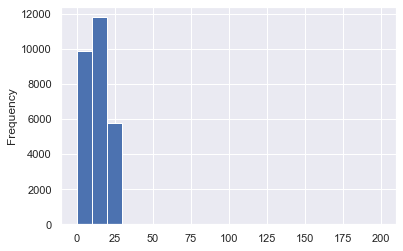

(label: [  0   0   0 ...  24  24 200]


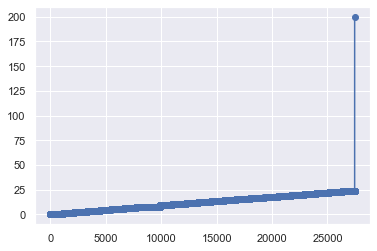

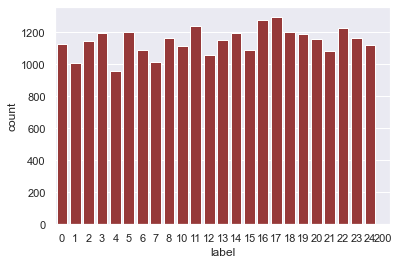

In [9]:
# 1. Training set
investigate_label(train_labels)

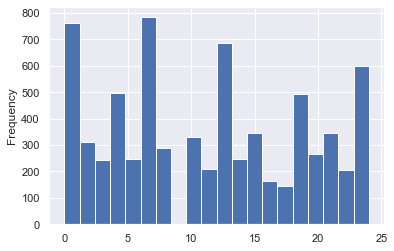

(label: [ 0  0  0 ... 24 24 24]


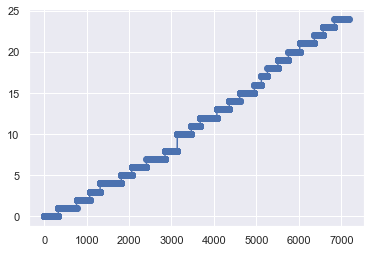

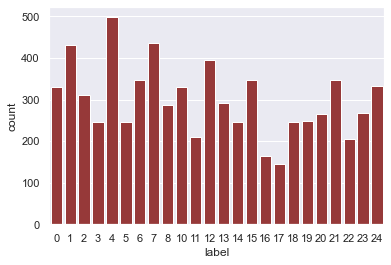

In [10]:
# 2. Test set
investigate_label(test_labels)

Because each training and test case represents a label (0-25), the maximum label in the training set is '200' which is not a valid label. There is only one record that has a label of 200, so this record will be discarded.

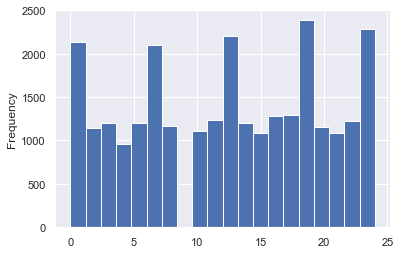

(label: [ 0  0  0 ... 24 24 24]


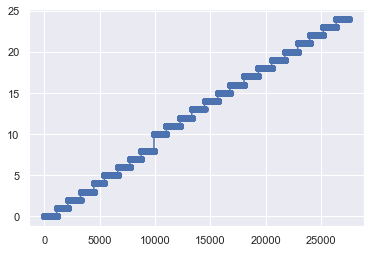

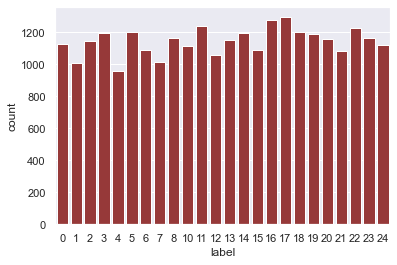

In [11]:
# Remove labels that are greater than 25
df_train = df_train.drop(df_train[df_train.label > 25].index)

# Update labels and images
train_labels = df_train['label']
df_train_images = df_train.drop('label', axis = 1)

# Check train_labels again
investigate_label(train_labels)

Since the labels don't contain the values 9 and 25 due to the mnist description (no cases for 9=J or 25=Z because of gesture motions), reduce by 1 unit for labels with values greater than 8 to ensure no ambiguity

In [12]:
def update_labels(labels_series):
    
    # If labels contain 9, no need to update values
    if 9 in labels_series.unique():
        return labels_series
    
    # Minus 1 with value that is greater than 8
    result = pd.Series(np.where(labels_series > 8, labels_series - 1 , labels_series))
    return result

# Show unique values in training labels
print("Training labels")
print(f"Before updating training labels:\n{np.unique(train_labels)}")
train_labels = update_labels(train_labels)
print(f"After updating training labels:\n{np.unique(train_labels)}")

# Show unique values in test labels
print("Test labels")
print(f"Before updating test labels:\n{np.unique(test_labels)}")
test_labels = update_labels(test_labels)
print(f"After updating test labels:\n{np.unique(test_labels)}")

Training labels
Before updating training labels:
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
After updating training labels:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Test labels
Before updating test labels:
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
After updating test labels:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Create a list of class names after update labels

In [13]:
# Create a list class names
class_names = []
for label in range(0,25):
    if (label != 9): # Skip with label equals 9 (J character)
        char = chr(label+65)
        class_names.append(char)
class_names = np.asarray(class_names)

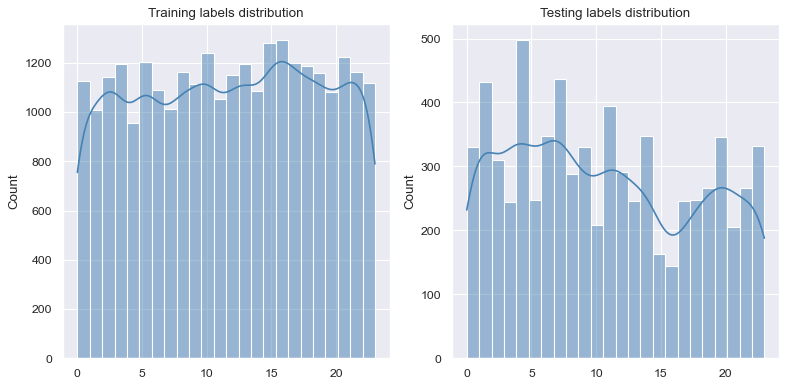

In [14]:
# Compare label distribution of training and test labels
figure(num=None, figsize=(10,5), dpi=80)

# Training labels
plt.subplot(1,2,1)
plt.title("Training labels distribution")
sns.histplot(train_labels,
             kde=True, 
             bins = 24,
             color = 'steelblue')


# Test labels
plt.subplot(1,2,2)
plt.title("Testing labels distribution")
sns.histplot(test_labels, 
             kde=True, 
             bins = 24,
             color = 'steelblue')

# Show
plt.tight_layout()
plt.show()

#### 1.2.2. Investigating Images
- Show description of data
- Reshape images into 28x28
- Display an image for each label

In [15]:
# Training data set
print("Description table for training set")
display(df_train_images.describe().T)
print()

# Training data set
print("Description table for test set")
display(df_test_images.describe().T)

Description table for training set


,count,mean,std,min,25%,50%,75%,max
pixel1,27454.0,145.420267,41.359046,0.0,121.00,150.0,174.0,255.0
pixel2,27454.0,148.501129,39.942628,0.0,126.00,153.0,176.0,255.0
pixel3,27454.0,151.248525,39.056766,0.0,130.00,156.0,178.0,255.0
pixel4,27454.0,153.547316,38.595731,0.0,133.00,158.0,179.0,255.0
pixel5,27454.0,156.211700,37.111598,0.0,137.00,160.0,181.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27454.0,162.735558,63.444883,0.0,125.00,184.0,207.0,255.0
pixel781,27454.0,162.904968,63.510071,0.0,128.00,184.0,207.0,255.0
pixel782,27454.0,161.965251,63.299560,0.0,128.00,182.0,206.0,255.0
pixel783,27454.0,161.136665,63.611245,0.0,128.00,182.0,204.0,255.0



Description table for test set


,count,mean,std,min,25%,50%,75%,max
pixel1,7172.0,147.532627,43.593144,0.0,122.00,154.0,178.0,255.0
pixel2,7172.0,150.445761,41.867838,0.0,126.00,157.0,179.0,255.0
pixel3,7172.0,153.324317,40.442728,0.0,130.00,159.0,181.0,255.0
pixel4,7172.0,155.663413,39.354776,0.0,134.00,161.0,182.0,255.0
pixel5,7172.0,158.169688,37.749637,0.0,137.00,163.0,184.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,7172.0,159.648494,65.499368,0.0,113.75,182.0,208.0,255.0
pixel781,7172.0,158.162019,66.493576,0.0,113.00,181.0,207.0,255.0
pixel782,7172.0,157.672755,66.009690,0.0,115.00,180.0,205.0,255.0
pixel783,7172.0,156.664250,67.202939,0.0,111.00,180.0,206.0,255.0


In [16]:
# Reshape images

# Training dataset
train_images = tf.reshape(df_train_images.values, shape=[-1,28,28])
print("After reshaping, value of train images:")
print(train_images)
print()

# Test dataset
test_images = tf.reshape(df_test_images.values, shape=[-1,28,28])
print("After reshaping, value of test images:")
print(test_images)

After reshaping, value of train images:
tf.Tensor(
[[[107 118 127 ... 170 170 169]
  [111 121 129 ... 171 171 170]
  [113 123 131 ... 171 171 171]
  ...
  [142 150 159 ... 202 201 200]
  [142 151 160 ... 204 203 202]
  [142 151 160 ... 204 203 202]]

 [[155 157 156 ... 138  92 108]
  [158 159 159 ... 142 116 143]
  [161 161 161 ... 147 125 140]
  ...
  [162 159 145 ...  91 101  94]
  [153 139 115 ...  97  95 120]
  [135 116  95 ... 103 135 149]]

 [[187 188 188 ...  66  77  83]
  [188 189 189 ...  73  73  71]
  [190 190 190 ...  74  68  61]
  ...
  [212 198 175 ... 195 193 192]
  [202 179 152 ... 195 194 193]
  [198 166 132 ... 195 194 195]]

 ...

 [[174 174 174 ... 160 158 156]
  [178 178 177 ... 162 160 158]
  [181 180 180 ... 164 162 161]
  ...
  [215 216 216 ... 201 199 198]
  [216 217 217 ... 201 200 198]
  [217 217 217 ... 202 200 200]]

 [[177 181 184 ... 181 179 177]
  [179 182 185 ... 183 181 179]
  [181 184 187 ... 185 183 182]
  ...
  [129 132 134 ...  94 102  70]
  [131 13

<function matplotlib.pyplot.show(close=None, block=None)>

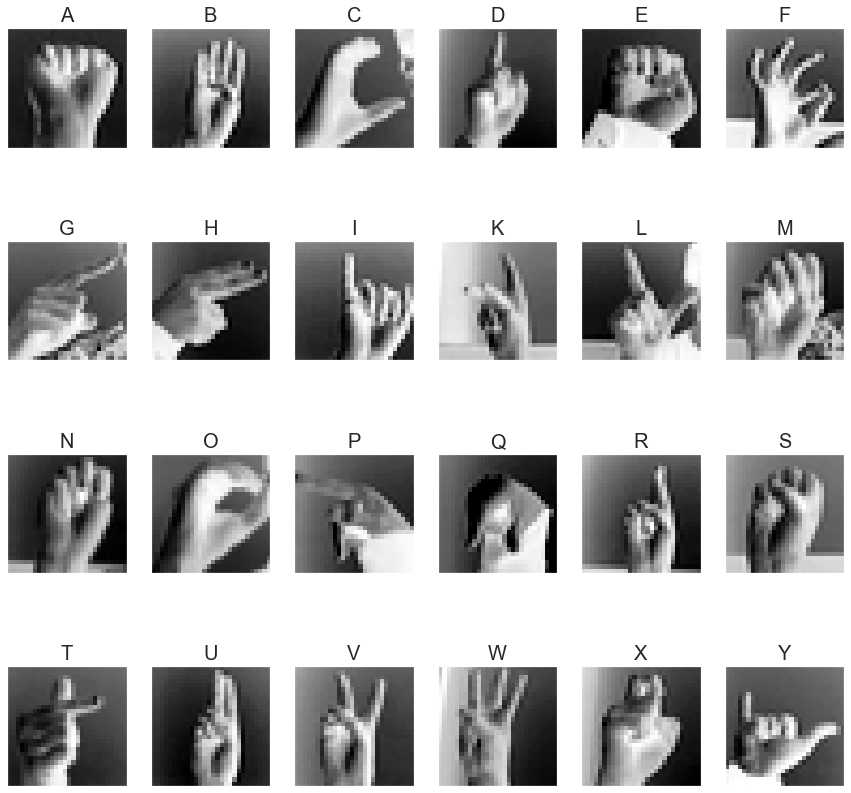

In [17]:
# Display images
plt.figure(figsize=(15,15))

# Calculate position of images
count = 0

# Display a sample image for each label
for i in range(0,25):
    
    # For each item, find the first image that has the same label as i
    for n in range(0,df_train_images.shape[0]):
        # Find label of the row
        label = train_labels[n]
        
        # If label is matched, display the image
        if(label==i):
            
            # Setting position of image
            plt.subplot(4,6,count+1)
            plt.xticks([])
            plt.yticks([])
            
            # Because label that is greater than 8 are minus 1, only showing the original label in the title
            # Title will not contain J and Z
            original_title = i
            if i > 8:
                original_title += 1
                
            # Using chr(65 + original_title) to show the character of the label
            plt.title(chr(65+original_title),fontsize=20)
            
            # Convert pixel values to image
            img = np.array(df_train_images.iloc[n].to_frame().T)
            
            # Display image
            plt.imshow(img.reshape(28,28),cmap='Greys')
            
            # Add 1 to count
            count = count + 1
            
            # Break because display only 1 sample for each label
            break

plt.show

As we can analyze from the above images that some images are very similar and hence, it is difficult to recognise them, for example:
1. A, E and S have a similar gesture.
2. M and N are almost the same.

#### 1.2.3. Split data into training, test and validation set
- Split test dataset into test and validation set. It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.
- Choose 2000 records for each validation and test set.
- I will only use the first 5000 training images (which is still over 100 per class) in order to keep run-times down

In [18]:
n_train = 5000
n_valid = 2000
n_test = 2000

In [19]:
# Training data set

# Get the first n_train values for training
X_train = train_images[:n_train,:,:]
y_train = train_labels[:n_train]

# Print shape of data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()

# Print head of labels
print("The first 5 rows in labels")
display(y_train.head())

Shape of X_train: (5000, 28, 28)
Shape of y_train: (5000,)

The first 5 rows in labels


0     3
1     6
2     2
3     2
4    12
dtype: int64

In [20]:
# Split test dataset into test and validation dataset
# n_valid records for validation set and n_test for test set
X_valid = test_images[:n_valid]
y_valid = test_labels[:n_test]
X_test = test_images[n_valid+1:2*n_valid+1]
y_test = test_labels[n_test+1:2*n_test+1]

# Print shape of data
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of y_valid: {y_valid.shape}")
print()
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print()

Shape of X_valid: (2000, 28, 28)
Shape of y_valid: (2000,)

Shape of X_test: (2000, 28, 28)
Shape of y_test: (2000,)



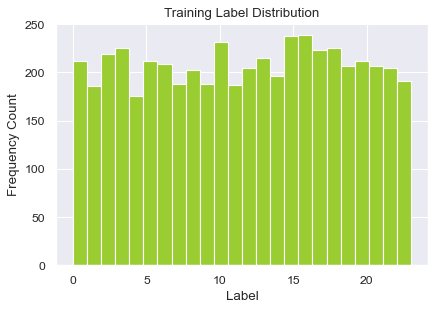

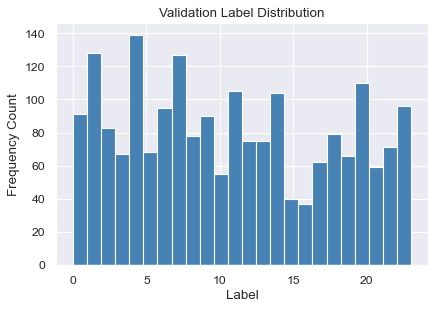

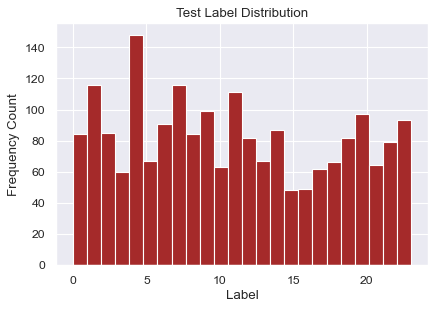

In [21]:
# Check the label distribution

def plot_label_distribution(y_data, dataset_name, color, position, bins=24):
    figure(num=None, figsize=(6,4), dpi=80)
    plt.title(f'{dataset_name} Label Distribution')
    plt.hist(y_data, color = color, bins = 24)
    plt.ylabel('Frequency Count')
    plt.xlabel('Label')
    plt.show()

# Training
plot_label_distribution(y_train, "Training", 'yellowgreen', 1)

# Validation
plot_label_distribution(y_valid, "Validation", 'steelblue', 2)

# Test
plot_label_distribution(y_test, "Test", 'brown', 3)

plt.show()

As we can see from the above diagram:
1. Distribution of training label is almost uniform.
2. Validation and test set are both similar and not uniform.

#### 1.2.4. Pre-process data
- Hot encode labels
- Scale data between 0 and 1

In [22]:
# One hot encoding
encoder = LabelBinarizer()
y_encoded_train = encoder.fit_transform(y_train)
y_encoded_valid = encoder.fit_transform(y_valid)
y_encoded_test = encoder.fit_transform(y_test)

In [23]:
# Scale data between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

## 2. Initial model successfully trained (and acting as a baseline)

In [24]:
# Common function

# function to run the model and calculate score and accuracy
def do_all(model_name, hidden_sizes, activation, optimizer, learning_rate, n_epochs, batch_size, further_callbacks=[], early_stopping_cb=None):
    # Create model
    if model_name == 'resnet':
        model = model_resnet_factory(hidden_sizes, activation, optimizer, learning_rate)
    elif model_name == 'cnn':
        model = model_cnn_factory(hidden_sizes, activation, optimizer, learning_rate)
    elif model_name == 'fully_connected':
        model = model_dense_factory(hidden_sizes, activation, optimizer, learning_rate)
    else:
        # Default cnn
        model = model_cnn_factory(hidden_sizes, activation, optimizer, learning_rate)
    
    # Training model without early stopping
    if early_stopping_cb is None:
        history = model.fit(
            X_train, 
            y_train, 
            epochs=n_epochs,
            validation_data=(X_valid, y_valid))
    else:
        # Training model with early stopping
        history = model.fit(
            X_train, 
            y_train, 
            epochs=n_epochs, 
            callbacks = [early_stopping_cb] + further_callbacks,
            validation_data=(X_valid, y_valid))
    
    # Get the best val acc
    max_val_acc = np.max(history.history['val_accuracy'])
    
    # Evaluation the model
    testres = model.evaluate(X_test, y_test, verbose=0)
    
    return (max_val_acc, testres[1], history, model)

# Plot the results (shifting validation curves appropriately)
def plot_history(history, title):
    # Setting figsize
    plt.figure(figsize=(8,5))
    
    # Plot accuracy and loss
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange', marker=".")
    plt.plot(np.arange(0,n),history.history['loss'],'b', marker=".")
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r', marker=".")  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g', marker=".")
    
    # Legend
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    
    # Grid
    plt.grid(True)
    
    # Title
    plt.title(title, fontsize=20)
    
    # Set the vertical range to [0-1] 
    plt.gca().set_ylim(0, 1) 
    
    # Show
    plt.show() 

In [25]:
# Reshape data to be [Nx, Ny, 1] because in CNN, data need a depth
X_train = tf.reshape(X_train, shape=[-1, 28, 28, 1])
X_valid = tf.reshape(X_valid, shape=[-1, 28, 28, 1])
X_test = tf.reshape(X_test, shape =[-1, 28, 28, 1])

In [26]:
# Common modelling parameters

# Activation function used by hidden layers
activation = 'relu'

# Optimizer
optimizer = keras.optimizers.Adam
learning_rate = 0.001 # default value

# Batch size and number of epochs
batch_size = 50
n_epochs = 20

### 2.1. CNN model
Build a convolutional neural network (CNN) with the following specifications:
- All filter (kernel) sizes are 3x3
- Initial Conv2D layer with 64 filters
- MaxPooling layer following this
- Second Conv2D layer with 128 filters
- Dense output layer after this with 24 units because there are 24 classes

In [27]:
# Number and size of hidden layers
hidden_sizes = [64, 128]

In [28]:
# Convolution Neural Network structure
def model_cnn_factory(hidden_sizes, activation, optimizer, learning_rate):
    model = Sequential()
    
    # Initial Conv2D layer
    model.add(Conv2D(
        filters=hidden_sizes[0], 
        kernel_size=3, 
        strides=1, 
        activation=activation, 
        padding="same", 
        kernel_initializer="he_uniform",
        input_shape=[28, 28, 1]))
    
    for n in hidden_sizes[1:]:
        
        # MaxPooling layer following this
        model.add(MaxPooling2D(pool_size=2))

        # Second Conv2D layer
        model.add(Conv2D(
            filters=n, 
            kernel_size=3, 
            strides=1, 
            padding="same", 
            activation=activation,
            kernel_initializer="he_uniform"))
    
    # unravel into a 1D vector
    model.add(Flatten())
    
    # output layer with 24 units
    model.add(Dense(24, activation = "softmax"))  
    
    # Compile model
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer(learning_rate=learning_rate), 
        metrics=["accuracy"])
    
    # Summary the model
    model.summary()
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 24)                602136    
                                                                 
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
__________________________________________________

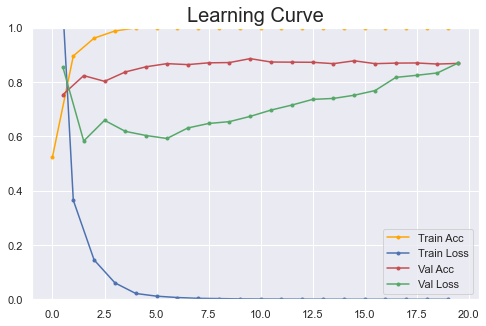

In [29]:
# Training and plotting CNN baseline model
start_time = time.time()
valacc, testacc, history, model = do_all("cnn", hidden_sizes, activation, optimizer, learning_rate, n_epochs, batch_size)
print(f"\n\nTime to run the model: {time.time() - start_time} seconds\n\n")
plot_history(history, 'Learning Curve')

From the above learning curve we can see that in less than 5 epochs only training accuracy reached 1 and training loss converges. Validation accuracy also reached more than 0.8 but validation loss diverges.

1/1 [==============================] - 0s 300ms/step
Predicted labels
[2 8 6]
Convert into letters
['C' 'I' 'G']
Actual labels
['C' 'I' 'G']


Predicted Label of the image: C


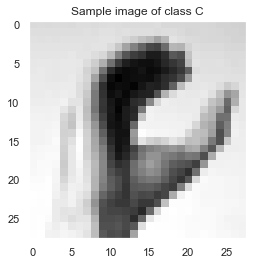



Predicted Label of the image: I


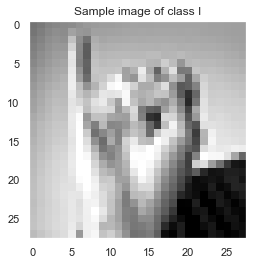



Predicted Label of the image: G


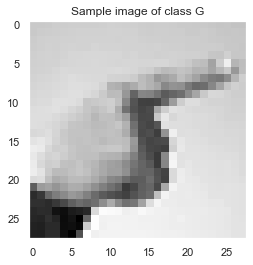

In [30]:
# Inspect output class prediction
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1) # Predict with the first 3 records

print("Predicted labels")
print(y_pred)
print("Convert into letters")
y_pred_classes = class_names[y_pred]
print(y_pred_classes)
print("Actual labels")
y_actual_classes = class_names[y_test[:3]]
print(y_actual_classes)

# Display images for 3 samples
for i in range(3):
    plt.grid(False)
    plt.title(f'Sample image of class {y_actual_classes[i]}')
    plt.imshow(tf.reshape(X_test[i], shape=[28,28]), cmap="gray")
    print(f'\n\nPredicted Label of the image: {y_pred_classes[i]}')
    plt.show()


In [31]:
# Printing scores
print('Vaidation Accuracy: ',valacc)
print('\nTesting Accuracy: ',testacc)

Vaidation Accuracy:  0.8855000138282776

Testing Accuracy:  0.877500057220459


### 2.2. Fully Connected Network

Build a fully connected network with:

- Input flatten layer with input shape is [28, 28, 1]
- The first layer with 256 unit
- The second dense layer with 64 unit 
- Output layer after this with 24 units because there are 24 classes

In [32]:
# Number and size of hidden layers
hidden_sizes = [256, 64]

In [33]:
# Fully connected network structure
def model_dense_factory(hidden_sizes, activation, optimizer, learning_rate):
    # Declare a model
    model = Sequential()
    
    # always have same sized inputs
    model.add(Flatten(input_shape = [28, 28, 1]))
    
    # Dense layers
    for n in hidden_sizes:
        model.add(Dense(n, activation = activation, kernel_initializer="he_uniform"))
    
    # Output layer with 24 units because there are 24 classes
    model.add(Dense(24, activation = "softmax"))   
    
    # Compile model
    model.compile(
        loss="sparse_categorical_crossentropy", 
        optimizer=optimizer(learning_rate=learning_rate), 
        metrics=["accuracy"])
    
    # Summary the model
    model.summary()
    
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 24)                1560      
                                                                 
Total params: 218,968
Trainable params: 218,968
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 2s 7ms/step - loss: 3.0971 - accuracy: 0.0818 - val_loss: 3.0449 - val_accuracy: 0.0860
Epoch 2/20
157/157 [==================

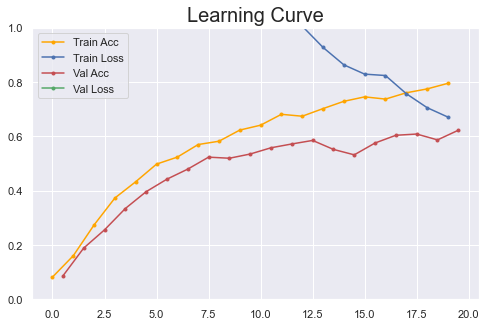

In [34]:
# Training and plotting fully connected network baseline model
start_time = time.time()
valacc, testacc, history, model = do_all("fully_connected", hidden_sizes, activation, optimizer, learning_rate, n_epochs, batch_size)
print(f"\n\nTime to run the model: {time.time() - start_time} seconds\n\n")
plot_history(history, 'Learning Curve')

In [35]:
# Printing scores
print('Vaidation Accuracy: ',valacc)
print('\nTesting Accuracy: ',testacc)

Vaidation Accuracy:  0.6220000386238098

Testing Accuracy:  0.627500057220459


### 2.3. ResNet
- Implementation example of Geron: Hands On Machine Learning 2019, Chapter 14
- ResNet with filter size is a series of 2 Residual Units with sizes of 32, 64

In [36]:
# Number and size of residual layers
residual_unit_filters=[32, 64]

In [37]:
# Create a residual unit layer
class ResidualUnit (keras.layers.Layer): 
    def __init__ (self, filters, strides=1, activation="relu", **kwargs): 
        super(). __init__ (**kwargs) 
        self.activation = keras.activations.get(activation) 
        self.main_layers = [ 
            Conv2D(filters, 3, strides=strides, 
                                padding="same", use_bias=False), 
            BatchNormalization(), 
            self.activation, 
            Conv2D(filters, 3, strides=1, 
                                padding="same", use_bias=False), 
            BatchNormalization()] 
        self.skip_layers = [] 
        if strides > 1: 
            self.skip_layers = [ 
                Conv2D(filters, 1, strides=strides, 
                                    padding="same", use_bias=False), 
                BatchNormalization()] 
            
    def call(self, inputs): 
        Z = inputs 
        for layer in self.main_layers: 
            Z = layer(Z) 
        skip_Z = inputs 
        for layer in self.skip_layers: 
            skip_Z = layer(skip_Z) 
        return self.activation(Z + skip_Z)

# Build a model manually
def model_resnet_factory(residual_unit_filters, activation, optimizer, learning_rate):
    initial_filters=32
    
    model = Sequential()
    
    # Conv2D layer
    model.add(Conv2D(initial_filters, 7, strides=2, 
                                  input_shape=[28, 28, 1], 
                                  padding="same", use_bias=False))
    
    # BatchNormalization layer
    model.add(BatchNormalization())
    
    # Activation function
    model.add(Activation(activation)) 
    
    # MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=3, strides=2, padding="same")) 

    # ResidualUnit
    prev_filters = initial_filters
    for filters in residual_unit_filters: 
        if filters == prev_filters: 
            strides = 1
        else:
            strides = 2
        model.add(ResidualUnit(filters, strides=strides)) 
        prev_filters = filters 

    # GlobalAvgPool2D layer
    model.add(GlobalAvgPool2D())
    
    # Flatten layer
    model.add(Flatten())
    
    # Output layer
    model.add(Dense(24, activation="softmax"))

    # Compile model
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer(learning_rate=learning_rate), 
                  metrics=["accuracy"])   

    # Summary the model
    model.summary()
    
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 7, 7, 32)         18688     
 )                                                               
                                                      

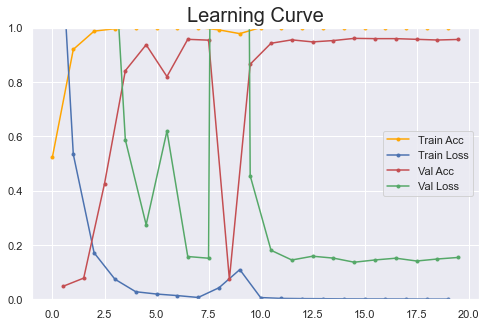

In [38]:
# Training and plotting ResNet baseline model
start_time = time.time()
valacc, testacc, history, model = do_all("resnet", residual_unit_filters, activation, optimizer, learning_rate, n_epochs, batch_size)
print(f"\n\nTime to run the model: {time.time() - start_time} seconds\n\n")
plot_history(history, 'Learning Curve')

In [39]:
# Printing scores
print('Vaidation Accuracy: ',valacc)
print('\nTesting Accuracy: ',testacc)

Vaidation Accuracy:  0.9600000381469727

Testing Accuracy:  0.9595000743865967


## 3. Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)

**1. Optimize hidden layers:** 

- Keep adding layers until over-fit. Using only up to 3 hidden layers to make the model less complex.

**2. Optimize learning rate:** 

- Learning rate is a very important hyperparameter for neural network model, different learning rate has different impact to gradient descent.

- Creating the grid of 0.1, 1.0 and 10.0 to show the difference on the model. It could be sluggish for tiny numbers and it might overshoot for the high ones.

**3. The method used to optimize the model:**

- Changing both number of hidden layers and learning rate at the same time.
- Using 32-256 as filter size as it helps to converge fast and finding the results fast.
- Using early stopping to stop the model if the desired results are found.

In [40]:
# Common modelling parameters

# based learning rate, multiply with the grid of 0.1, 1.0 and 10.0
learning_rate = 0.001

# Batch size
batch_size = 50

# Max epochs
n_epochs = 100

# Early stopping callback - this is executed when fitting and will stop and restore best result
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [41]:
# Method for optimizing models:
def optimize_model(model_name, filter_sizes):

    # Optimze the cnn model
    res_optimize=[]
    hist_optimize = []
    models_optimize = []

    # Start time
    start_time = time.time()

    # Changing both layers and learning rate with nested loop
    list_number_of_layers = [x for x in range(1, len(filter_sizes)+1)]

    for n in list_number_of_layers:
        for lr in [0.1, 1.0, 10.0]:
            print(f'\n\nFor number of layers: {n} and learning rate: {lr*learning_rate}')
            
            # Training
            valacc_optimize, testacc_optimize, history_optimize, model_optimize = do_all(
                model_name, 
                hidden_sizes[:n], 
                activation, 
                optimizer, 
                lr*learning_rate, 
                n_epochs, 
                batch_size, 
                early_stopping_cb = early_stopping_cb)
            
            # Plot history
            plot_history(history_optimize, f'Learning Curve for {str(n)} layers and learning rate {str(lr*learning_rate)}')
            
            # Get results
            res_optimize += [[n, lr*learning_rate, valacc_optimize, testacc_optimize]]
            hist_optimize += [history_optimize]
            models_optimize += [model_optimize]
            
    print(f"\n\nTime to run model: {(time.time() - start_time)} seconds\n\n")
    
    return res_optimize, hist_optimize, models_optimize

### 3.1. Optimize Convolution Neural Network

- Using C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) to find more depth or details of the image which could be helpful for proper classification of the images

In [42]:
# Hidden sizes
hidden_sizes = [64, 128, 256]



For number of layers: 1 and learning rate: 0.0001
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 24)                1204248   
                                                                 
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 4s 21ms/step - loss: 2.5071 - accuracy: 0.3148 - val_loss: 2.1191 - val_accuracy: 0.4040
Epoch 2/100
157/157 [==============================] - 3s 20ms/step - loss: 1.4153 - accuracy: 0.6198 - val_loss

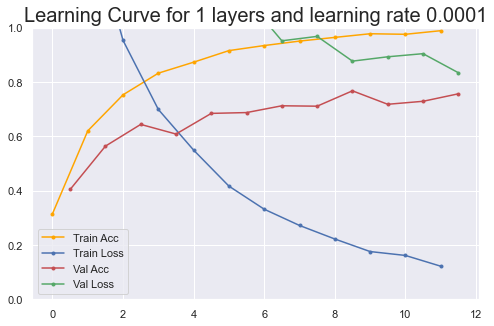



For number of layers: 1 and learning rate: 0.001
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 24)                1204248   
                                                                 
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 4s 22ms/step - loss: 7.9692 - accuracy: 0.4298 - val_loss: 1.1776 - val_accuracy: 0.6515
Epoch 2/100
157/157 [==============================] - 3s 21ms/step - loss: 0.4052 - accuracy: 0.8820 - val_loss:

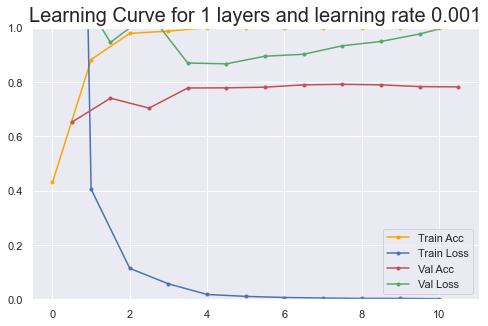



For number of layers: 1 and learning rate: 0.01
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_7 (Dense)             (None, 24)                1204248   
                                                                 
Total params: 1,204,888
Trainable params: 1,204,888
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 4s 22ms/step - loss: 19.8278 - accuracy: 0.6414 - val_loss: 0.9948 - val_accuracy: 0.7165
Epoch 2/100
157/157 [==============================] - 3s 21ms/step - loss: 0.0640 - accuracy: 0.9900 - val_loss:

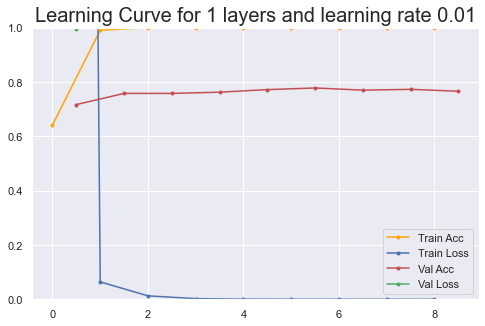



For number of layers: 2 and learning rate: 0.0001
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 24)                602136    
                                                                 
Total params: 676,632
Trainable params: 676,632
Non-trainable params

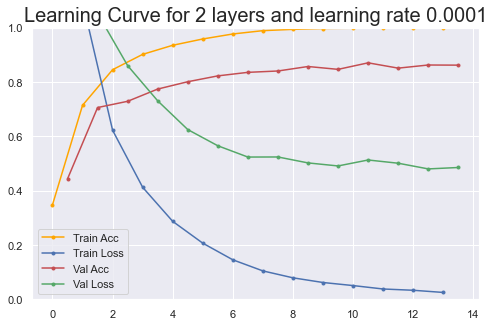



For number of layers: 2 and learning rate: 0.001
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 24)                602136    
                                                                 
Total params: 676,632
Trainable params: 676,632
Non-trainable params:

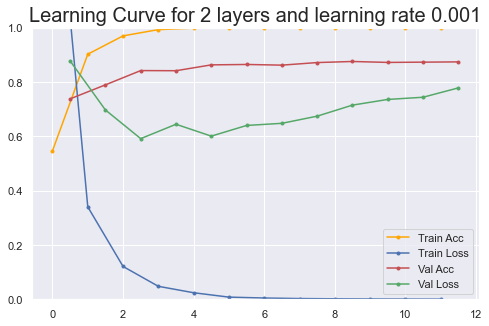



For number of layers: 2 and learning rate: 0.01
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 24)                602136    
                                                                 
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 

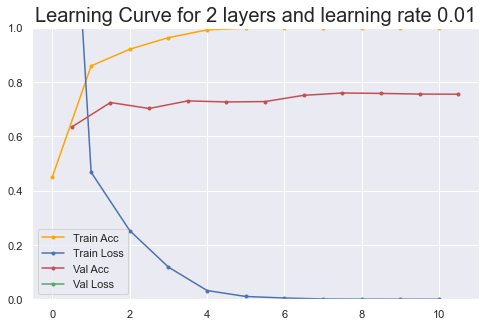



For number of layers: 3 and learning rate: 0.0001
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 f

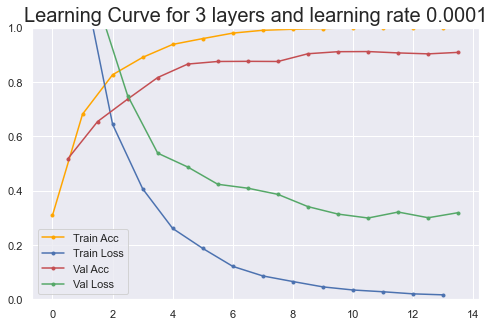



For number of layers: 3 and learning rate: 0.001
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 f

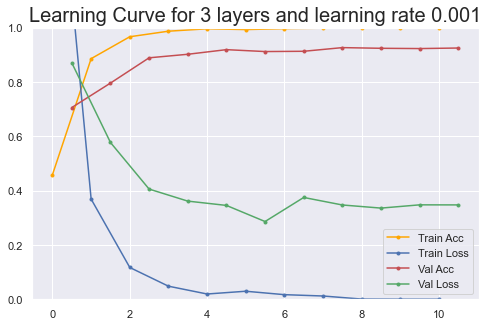



For number of layers: 3 and learning rate: 0.01
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 fl

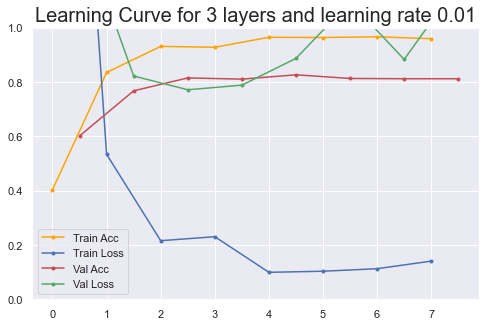



Time to run model: 237.8061239719391 seconds


The result after tuning hyperparameters


,layers,learning rate,val accuracy,test accuracy
7,3,0.0010,0.9260,0.9430
6,3,0.0001,0.9115,0.9225
4,2,0.0010,0.8750,0.8795
3,2,0.0001,0.8700,0.8725
8,3,0.0100,0.8260,0.8150
1,1,0.0010,0.7910,0.7945
2,1,0.0100,0.7775,0.7765
0,1,0.0001,0.7670,0.7685
5,2,0.0100,0.7590,0.7775


In [43]:
# Optimize CNN model
cnn_res_optimize, cnn_hist_optimize, cnn_model_optimize = optimize_model("cnn", hidden_sizes)

# Convert result into dataframe
df_cnn_res_optimize = pd.DataFrame(
    cnn_res_optimize, 
    columns=['layers', 'learning rate', 'val accuracy', 'test accuracy'])

# Show result after tuning hyperparameters order by val accuracy
print("The result after tuning hyperparameters")
sorted_df_cnn_res_optimize = df_cnn_res_optimize.sort_values(by=['val accuracy'], ascending=False)
display(sorted_df_cnn_res_optimize)

# Get the best model
cnn_best_model = cnn_model_optimize[sorted_df_cnn_res_optimize.index[0]]

Learning rate at 0.01 gives very poor results. And the learning rate from 0.001 to 0.0001 gives much better results. For Layer 1 we are getting good results as loss is also converging but validation loss is above 1. When we using two layers we get better results as compared to previous one but still validation loss is high. When we are using all the three layers we are getting our best result.

In summary, with the number of hidden layers of 3, the learning rate of 0.001, we get the best results

### 3.2. Optimize Fully Connected Network

In [44]:
# Hidden sizes
hidden_sizes = [64, 128, 256]



For number of layers: 1 and learning rate: 0.0001
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 24)                1560      
                                                                 
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 7ms/step - loss: 3.1608 - accuracy: 0.0510 - val_loss: 3.1032 - val_accuracy: 0.0900
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 3.0379 - accuracy: 0.1088 - val_loss: 3.002

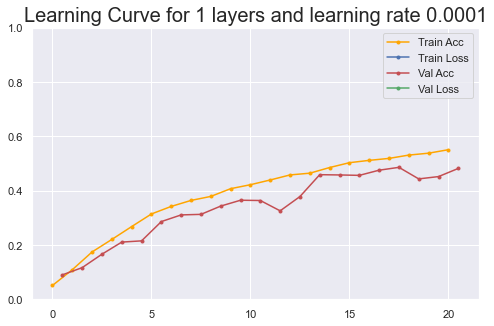



For number of layers: 1 and learning rate: 0.001
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 24)                1560      
                                                                 
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 6ms/step - loss: 3.1000 - accuracy: 0.0872 - val_loss: 2.9882 - val_accuracy: 0.1695
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 2.7533 - accuracy: 0.2100 - val_loss: 2.6025

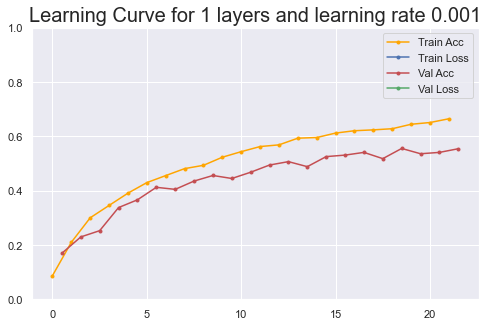



For number of layers: 1 and learning rate: 0.01
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 24)                1560      
                                                                 
Total params: 51,800
Trainable params: 51,800
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 7ms/step - loss: 3.2701 - accuracy: 0.0448 - val_loss: 3.1955 - val_accuracy: 0.0185
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 3.1780 - accuracy: 0.0464 - val_loss: 3.2021 

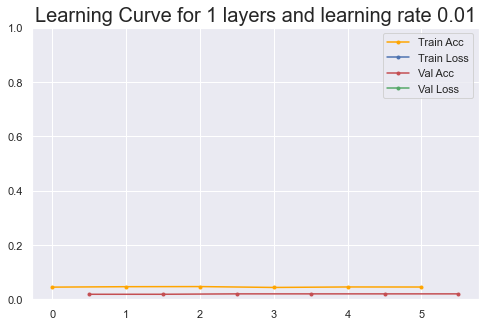



For number of layers: 2 and learning rate: 0.0001
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 24)                3096      
                                                                 
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 7ms/step - loss: 3.1101 - accuracy: 0.1006 - val_loss: 3.0828 - val_acc

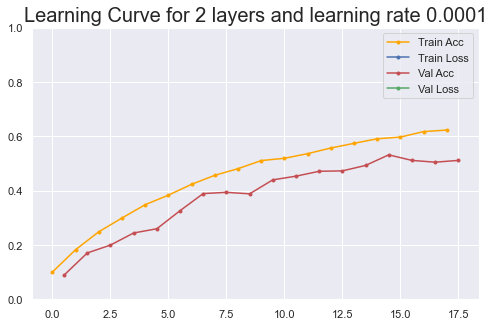



For number of layers: 2 and learning rate: 0.001
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                50240     
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 24)                3096      
                                                                 
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 7ms/step - loss: 2.9028 - accuracy: 0.1420 - val_loss: 2.5388 - val_accu

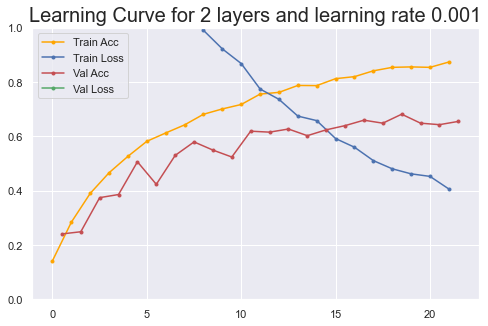



For number of layers: 2 and learning rate: 0.01
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 24)                3096      
                                                                 
Total params: 61,656
Trainable params: 61,656
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
157/157 [==============================] - 1s 7ms/step - loss: 3.3087 - accuracy: 0.0482 - val_loss: 3.1951 - val_accur

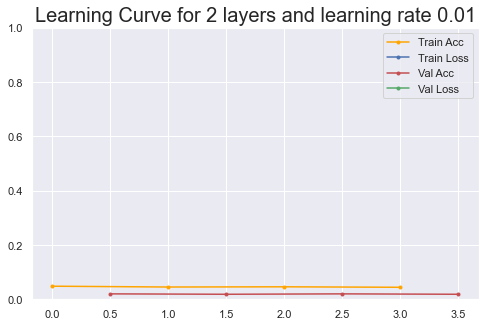



For number of layers: 3 and learning rate: 0.0001
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 24)                6168      
                                                                 
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_______________________________________________________________

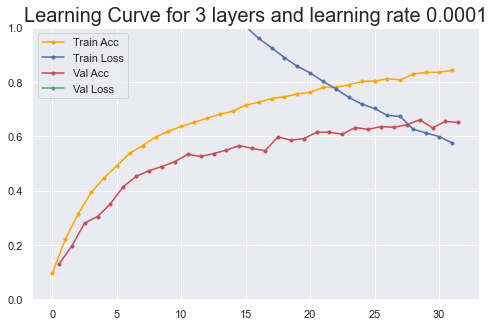



For number of layers: 3 and learning rate: 0.001
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dense_35 (Dense)            (None, 256)               33024     
                                                                 
 dense_36 (Dense)            (None, 24)                6168      
                                                                 
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
________________________________________________________________

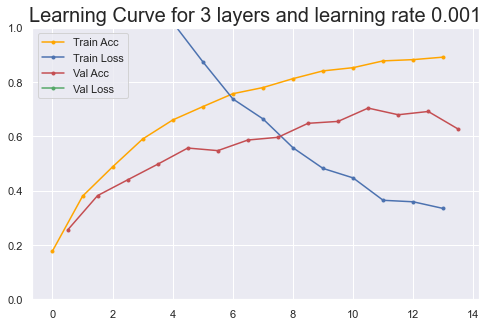



For number of layers: 3 and learning rate: 0.01
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                50240     
                                                                 
 dense_38 (Dense)            (None, 128)               8320      
                                                                 
 dense_39 (Dense)            (None, 256)               33024     
                                                                 
 dense_40 (Dense)            (None, 24)                6168      
                                                                 
Total params: 97,752
Trainable params: 97,752
Non-trainable params: 0
_________________________________________________________________

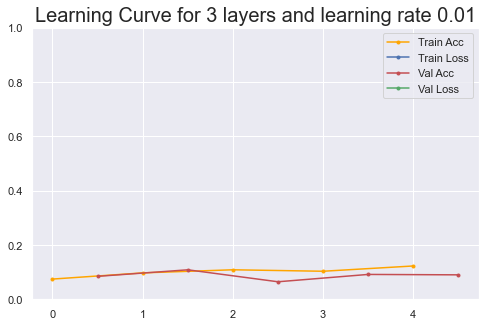



Time to run model: 142.91867899894714 seconds


The result after tuning hyperparameters


,layers,learning rate,val accuracy,test accuracy
7,3,0.0010,0.7035,0.711
4,2,0.0010,0.6810,0.691
6,3,0.0001,0.6605,0.670
1,1,0.0010,0.5550,0.565
3,2,0.0001,0.5315,0.542
0,1,0.0001,0.4855,0.502
8,3,0.0100,0.1085,0.119
2,1,0.0100,0.0200,0.024
5,2,0.0100,0.0200,0.024


In [45]:
# Optimize fully connected network model
dense_res_optimize, dense_hist_optimize, dense_model_optimize = optimize_model("fully_connected", hidden_sizes)

# Convert result into dataframe
df_dense_res_optimize = pd.DataFrame(
    dense_res_optimize, 
    columns=['layers', 'learning rate', 'val accuracy', 'test accuracy'])

# Show result after tuning hyperparameters order by val accuracy
print("The result after tuning hyperparameters")
sorted_df_dense_res_optimize = df_dense_res_optimize.sort_values(by=['val accuracy'], ascending=False)
display(sorted_df_dense_res_optimize)

# Get the best model
dense_best_model = dense_model_optimize[sorted_df_dense_res_optimize.index[0]]

The hyperparameter tuning results are also quite similar to the CNN model: we are getting the best results when we have a low value of learning rate and a high number of layers.

### 3.3. Optimize ResNet

In [46]:
residual_unit_filters=[32, 64, 128]



For number of layers: 1 and learning rate: 0.0001
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_2 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
 

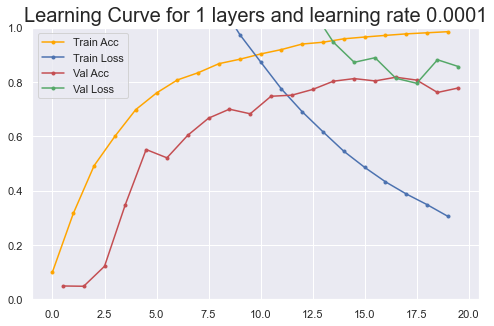



For number of layers: 1 and learning rate: 0.001
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_3 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
  

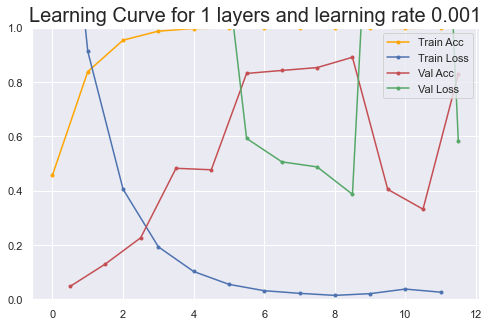



For number of layers: 1 and learning rate: 0.01
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_14 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_4 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
   

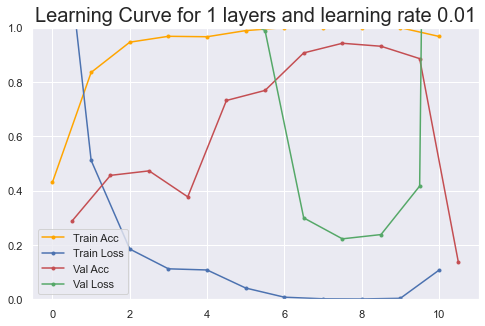



For number of layers: 2 and learning rate: 0.0001
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_18 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_5 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
 

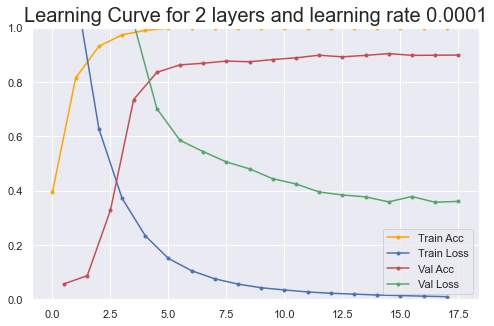



For number of layers: 2 and learning rate: 0.001
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_25 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_7 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
  

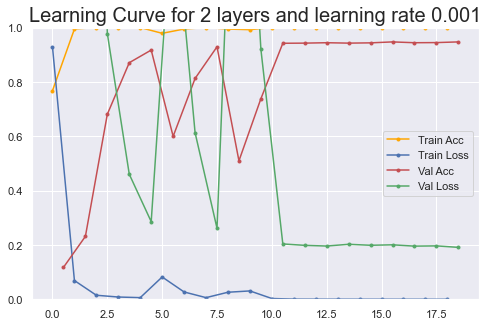



For number of layers: 2 and learning rate: 0.01
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_32 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_9 (ResidualUn  (None, 4, 4, 64)         58112     
 it)                                                             
   

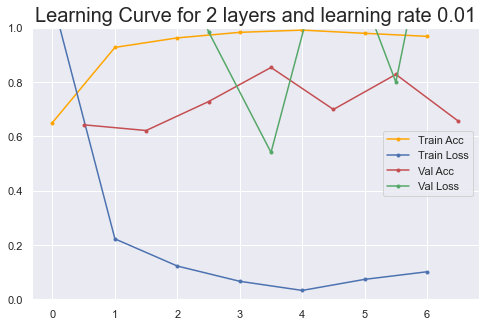



For number of layers: 3 and learning rate: 0.0001
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_39 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_11 (ResidualU  (None, 4, 4, 64)         58112     
 nit)                                                            
 

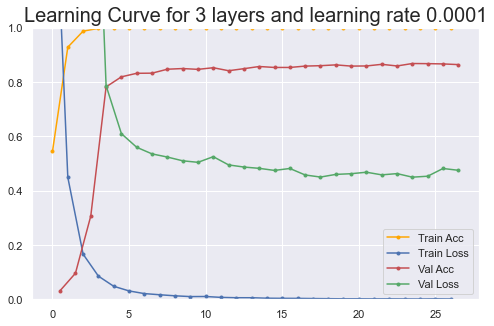



For number of layers: 3 and learning rate: 0.001
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_49 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_14 (ResidualU  (None, 4, 4, 64)         58112     
 nit)                                                            
  

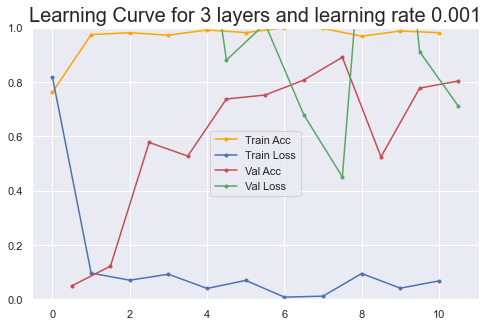



For number of layers: 3 and learning rate: 0.01
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_59 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_17 (ResidualU  (None, 4, 4, 64)         58112     
 nit)                                                            
   

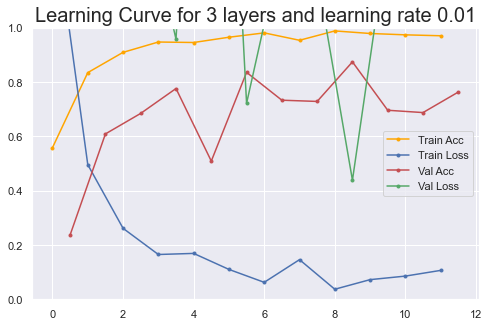



Time to run model: 253.88834190368652 seconds


The result after tuning hyperparameters


,layers,learning rate,val accuracy,test accuracy
4,2,0.0010,0.9470,0.9540
2,1,0.0100,0.9420,0.9495
3,2,0.0001,0.9040,0.9225
1,1,0.0010,0.8905,0.8850
7,3,0.0010,0.8905,0.9070
8,3,0.0100,0.8735,0.8910
6,3,0.0001,0.8675,0.8825
5,2,0.0100,0.8530,0.8615
0,1,0.0001,0.8170,0.8275


In [47]:
# Optimize ResNet model
resnet_res_optimize, resnet_hist_optimize, resnet_model_optimize = optimize_model("resnet", residual_unit_filters)

# Convert result into dataframe
df_resnet_res_optimize = pd.DataFrame(
    resnet_res_optimize, 
    columns=['layers', 'learning rate', 'val accuracy', 'test accuracy'])

# Show result after tuning hyperparameters order by val accuracy
print("The result after tuning hyperparameters")
sorted_df_resnet_res_optimize = df_resnet_res_optimize.sort_values(by=['val accuracy'], ascending=False)
display(sorted_df_resnet_res_optimize)

# Get the best model
resnet_best_model = resnet_model_optimize[sorted_df_resnet_res_optimize.index[0]]

## 4. Comparison of models, selection of the best two and reporting of final results

### 4.1. Comparision of models and select the best model

In [48]:
#plot when changing both learning rate and layers in cnn
def plot_all_history(list_history, model_name):
    # Setting figsize
    plt.figure(figsize=(15,15))
    
    # title of all learning curves
    plt.suptitle(f'\n\nLearning Curve when chaging layers and learning rate of {model_name}:', size=20, y=1.1)
    
    # Plot each history data
    for i in range(0,len(list_history)):
        # Position
        plt.subplot(4,3,i+1)
        
        # Plot accuracy, loss, val_accuracy, val_loss
        n = len(list_history[i].history['accuracy'])
        plt.plot(np.arange(0,n),list_history[i].history['accuracy'], color='orange')
        plt.plot(np.arange(0,n),list_history[i].history['loss'],'b')
        plt.plot(np.arange(0,n)+0.5,list_history[i].history['val_accuracy'],'r')  # offset both validation curves
        plt.plot(np.arange(0,n)+0.5,list_history[i].history['val_loss'],'g')
        
        # legend
        plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
        
        # Grid
        plt.grid(True)
        
        # Lable
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        
        # Title
        settings = dense_res_optimize[i]
        number_of_layers = settings[0]
        learning_rate = settings[1]
        plt.title(f'Learning Curve with layers = {number_of_layers} and lr = {learning_rate}' , fontsize=12)
        
        # Limit the y from 0 to 1
        plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
        
        # Adjust the padding between and around subplots.
        plt.tight_layout()
        
    # Show
    plt.show()

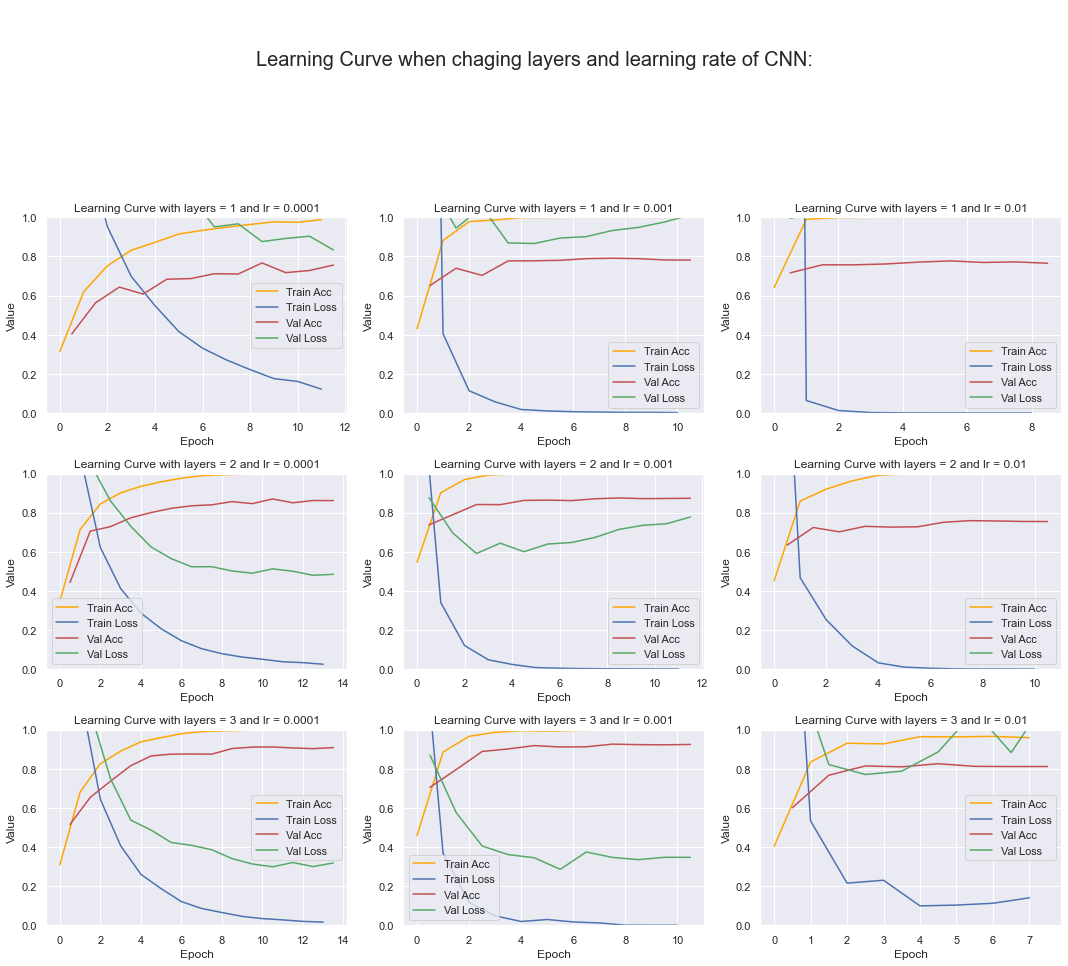

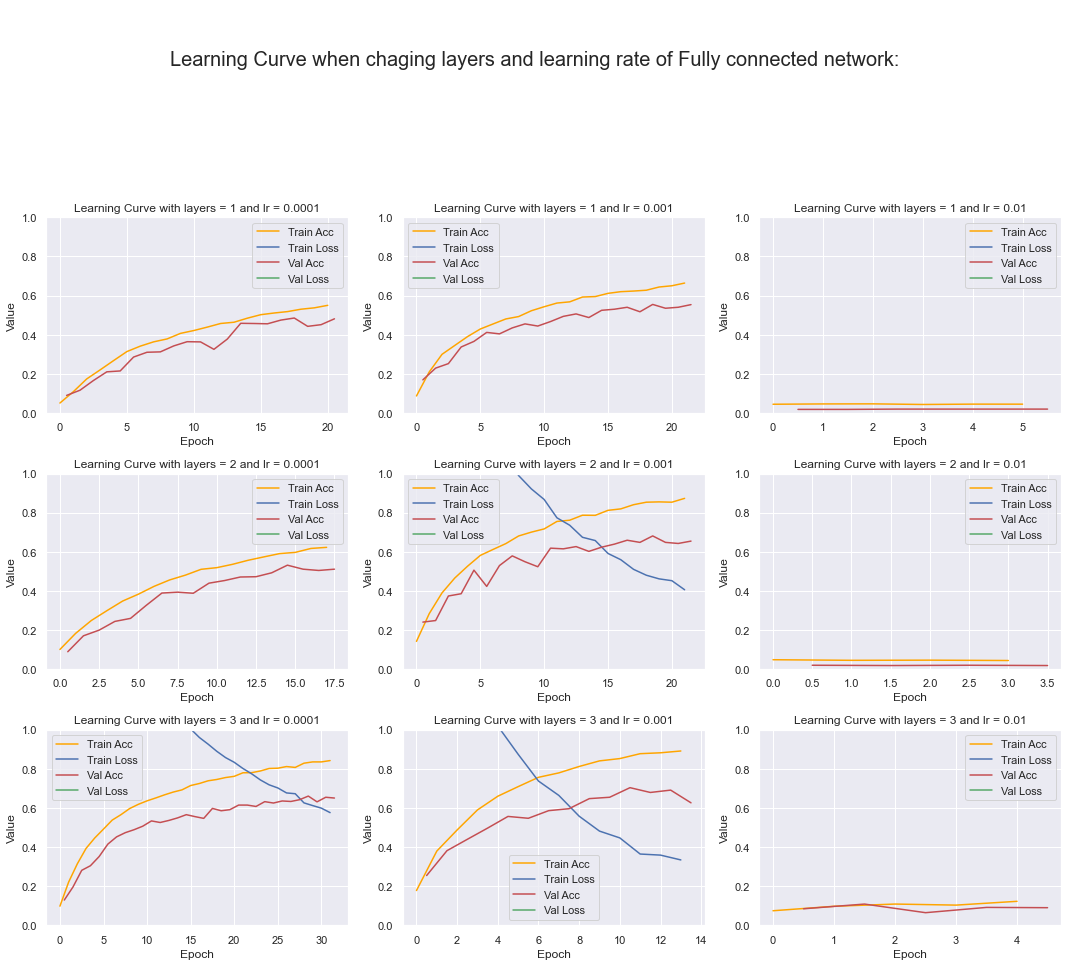

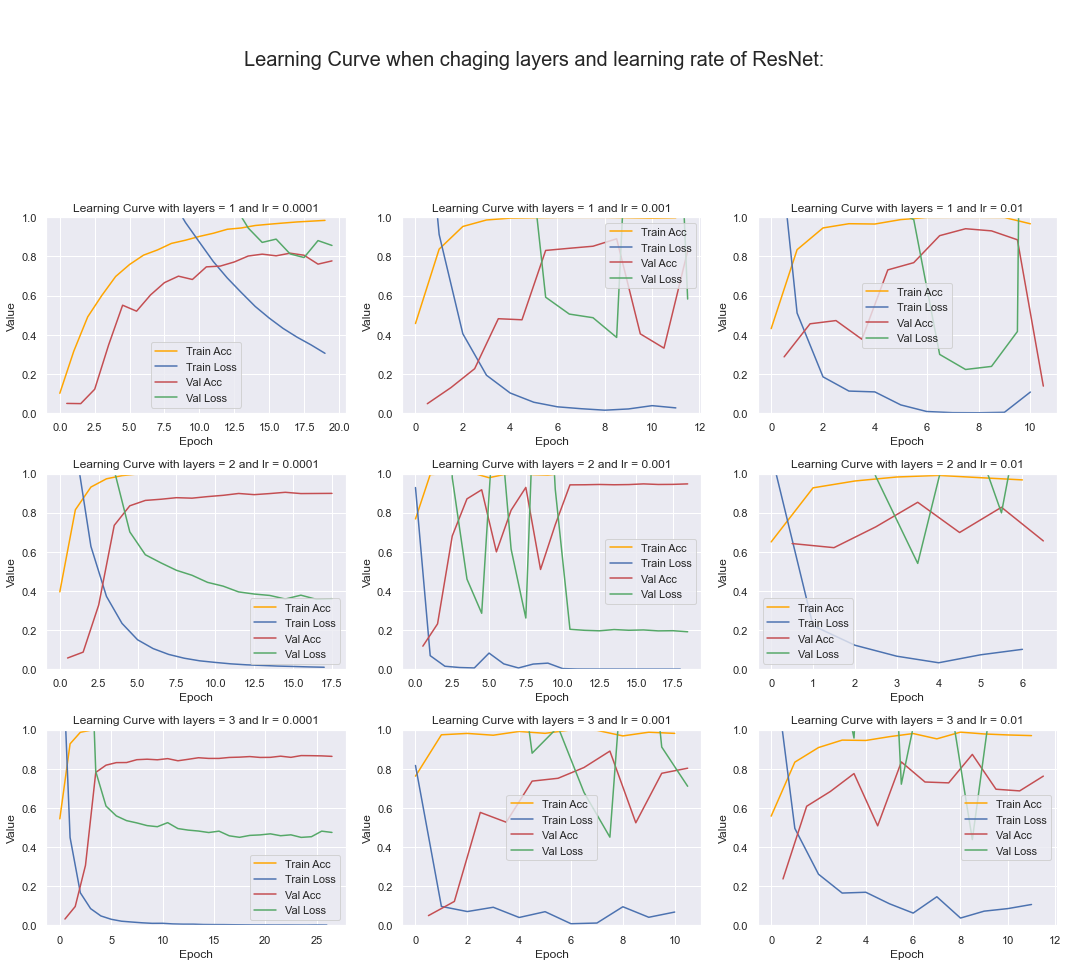

CNN optimization results


,layers,learning rate,val accuracy,test accuracy
7,3,0.0010,0.9260,0.9430
6,3,0.0001,0.9115,0.9225
4,2,0.0010,0.8750,0.8795
3,2,0.0001,0.8700,0.8725
8,3,0.0100,0.8260,0.8150
1,1,0.0010,0.7910,0.7945
2,1,0.0100,0.7775,0.7765
0,1,0.0001,0.7670,0.7685
5,2,0.0100,0.7590,0.7775





Fully connected network optimization results


,layers,learning rate,val accuracy,test accuracy
7,3,0.0010,0.7035,0.711
4,2,0.0010,0.6810,0.691
6,3,0.0001,0.6605,0.670
1,1,0.0010,0.5550,0.565
3,2,0.0001,0.5315,0.542
0,1,0.0001,0.4855,0.502
8,3,0.0100,0.1085,0.119
2,1,0.0100,0.0200,0.024
5,2,0.0100,0.0200,0.024





ResNet optimization results


,layers,learning rate,val accuracy,test accuracy
4,2,0.0010,0.9470,0.9540
2,1,0.0100,0.9420,0.9495
3,2,0.0001,0.9040,0.9225
1,1,0.0010,0.8905,0.8850
7,3,0.0010,0.8905,0.9070
8,3,0.0100,0.8735,0.8910
6,3,0.0001,0.8675,0.8825
5,2,0.0100,0.8530,0.8615
0,1,0.0001,0.8170,0.8275


In [49]:
plot_all_history(cnn_hist_optimize, "CNN")
plot_all_history(dense_hist_optimize, "Fully connected network")
plot_all_history(resnet_hist_optimize, "ResNet")

print("CNN optimization results")
display(sorted_df_cnn_res_optimize)

print("\n\n")

print("Fully connected network optimization results")
display(sorted_df_dense_res_optimize)

print("\n\n")

print("ResNet optimization results")
display(sorted_df_resnet_res_optimize)

1. From result above:

    - Fully connected network does not perform as well as the convolutional neural network and ResNet. The loss of both validation and training of fully connected network usually are above 1.0 and the accuracy is pretty low.
    - The results are based on using the first 5000 records of the training set, and 2000 records for each validation data set and test data set.
    - The best hyperparameters for CNN is:
        - Hidden layers: 3
        - Learning rate: 0.001
    - The best hyperparameters for Fully connected network is:
        - Hidden layers: 2
        - Learning rate: 0.001
    - The best hyperparameters for ResNet is:
        - 2 Residual Units with filter sizes of 32 and 64
        - Learning rate: 0.01

2. The validation accuracy for CNN model:
    - Baseline model:
       - val accuracy: 0.89

    - Model after tuning hyperparameters:  
       - val accuracy: 0.93

3. The validation accuracy for fully connected model:

   - Baseline model:
       - val accuracy: 0.62
   
   - Model after tuning hyperparameters:
       - val accuracy: 0.70
       
4. The validation accuracy for ResNet:

   - Baseline model:
       - val accuracy: 0.96
   
   - Model after tuning hyperparameters:
       - val accuracy: 0.95

So finally we have selected the ResNet with 2 Residual Units wite sizes of 32 and 64 and 0.01 learning rate for the best model because it gives a significant improvement in training and validation accuracy (both are above 0.9) and there is a significant decrease in both losses.

The second best model is the CNN with 3 hidden layers and 0.001 learning rate

### 4.2. The final result

1. Take the best model (ResNet with 2 Residual Units with same filter size of 32 and 0.001 learning rate) and show the confusion matrix for its prediction.
2. Find out the letter with the lowest individual accuracy and the most common error (of one letter being incorrectly labelled as another).
3. Statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
4. For each letters:
- report the overall accuracy
- report the accuracy for each individual letter
- write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation

#### 4.2.1. Take the best model and show the confusion matrix

Epoch 1/100
157/157 [==============================] - 2s 11ms/step - loss: 2.6325e-04 - accuracy: 1.0000 - val_loss: 0.1952 - val_accuracy: 0.9485
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 2.0818e-04 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9470
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 1.7024e-04 - accuracy: 1.0000 - val_loss: 0.1959 - val_accuracy: 0.9490
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 1.4228e-04 - accuracy: 1.0000 - val_loss: 0.1894 - val_accuracy: 0.9505
Epoch 5/100
157/157 [==============================] - 2s 11ms/step - loss: 1.4131e-04 - accuracy: 1.0000 - val_loss: 0.1872 - val_accuracy: 0.9490
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 1.4158e-04 - accuracy: 1.0000 - val_loss: 0.1968 - val_accuracy: 0.9475
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.1467 - accuracy: 0.9590


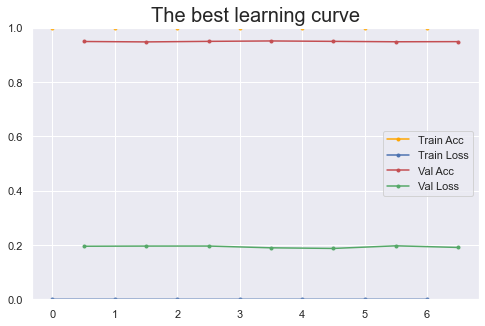

Validate accuracy: 0.9505000710487366
Test accuracy: 0.9590000510215759


In [50]:
# Evaluation the model
the_best_model = resnet_best_model

# Training model with early stopping
history = the_best_model.fit(
    X_train, 
    y_train, 
    epochs=n_epochs, 
    callbacks = [early_stopping_cb],
    validation_data=(X_valid, y_valid))
    
# Get the best val acc
max_val_acc = np.max(history.history['val_accuracy'])
    
# Evaluation the model
testres = the_best_model.evaluate(X_test, y_test, verbose=1)

plot_history(history, "The best learning curve")

print(f"Validate accuracy: {max_val_acc}")
      
print(f"Test accuracy: {testres[1]}")

63/63 [==============================] - 0s 3ms/step


<AxesSubplot:>

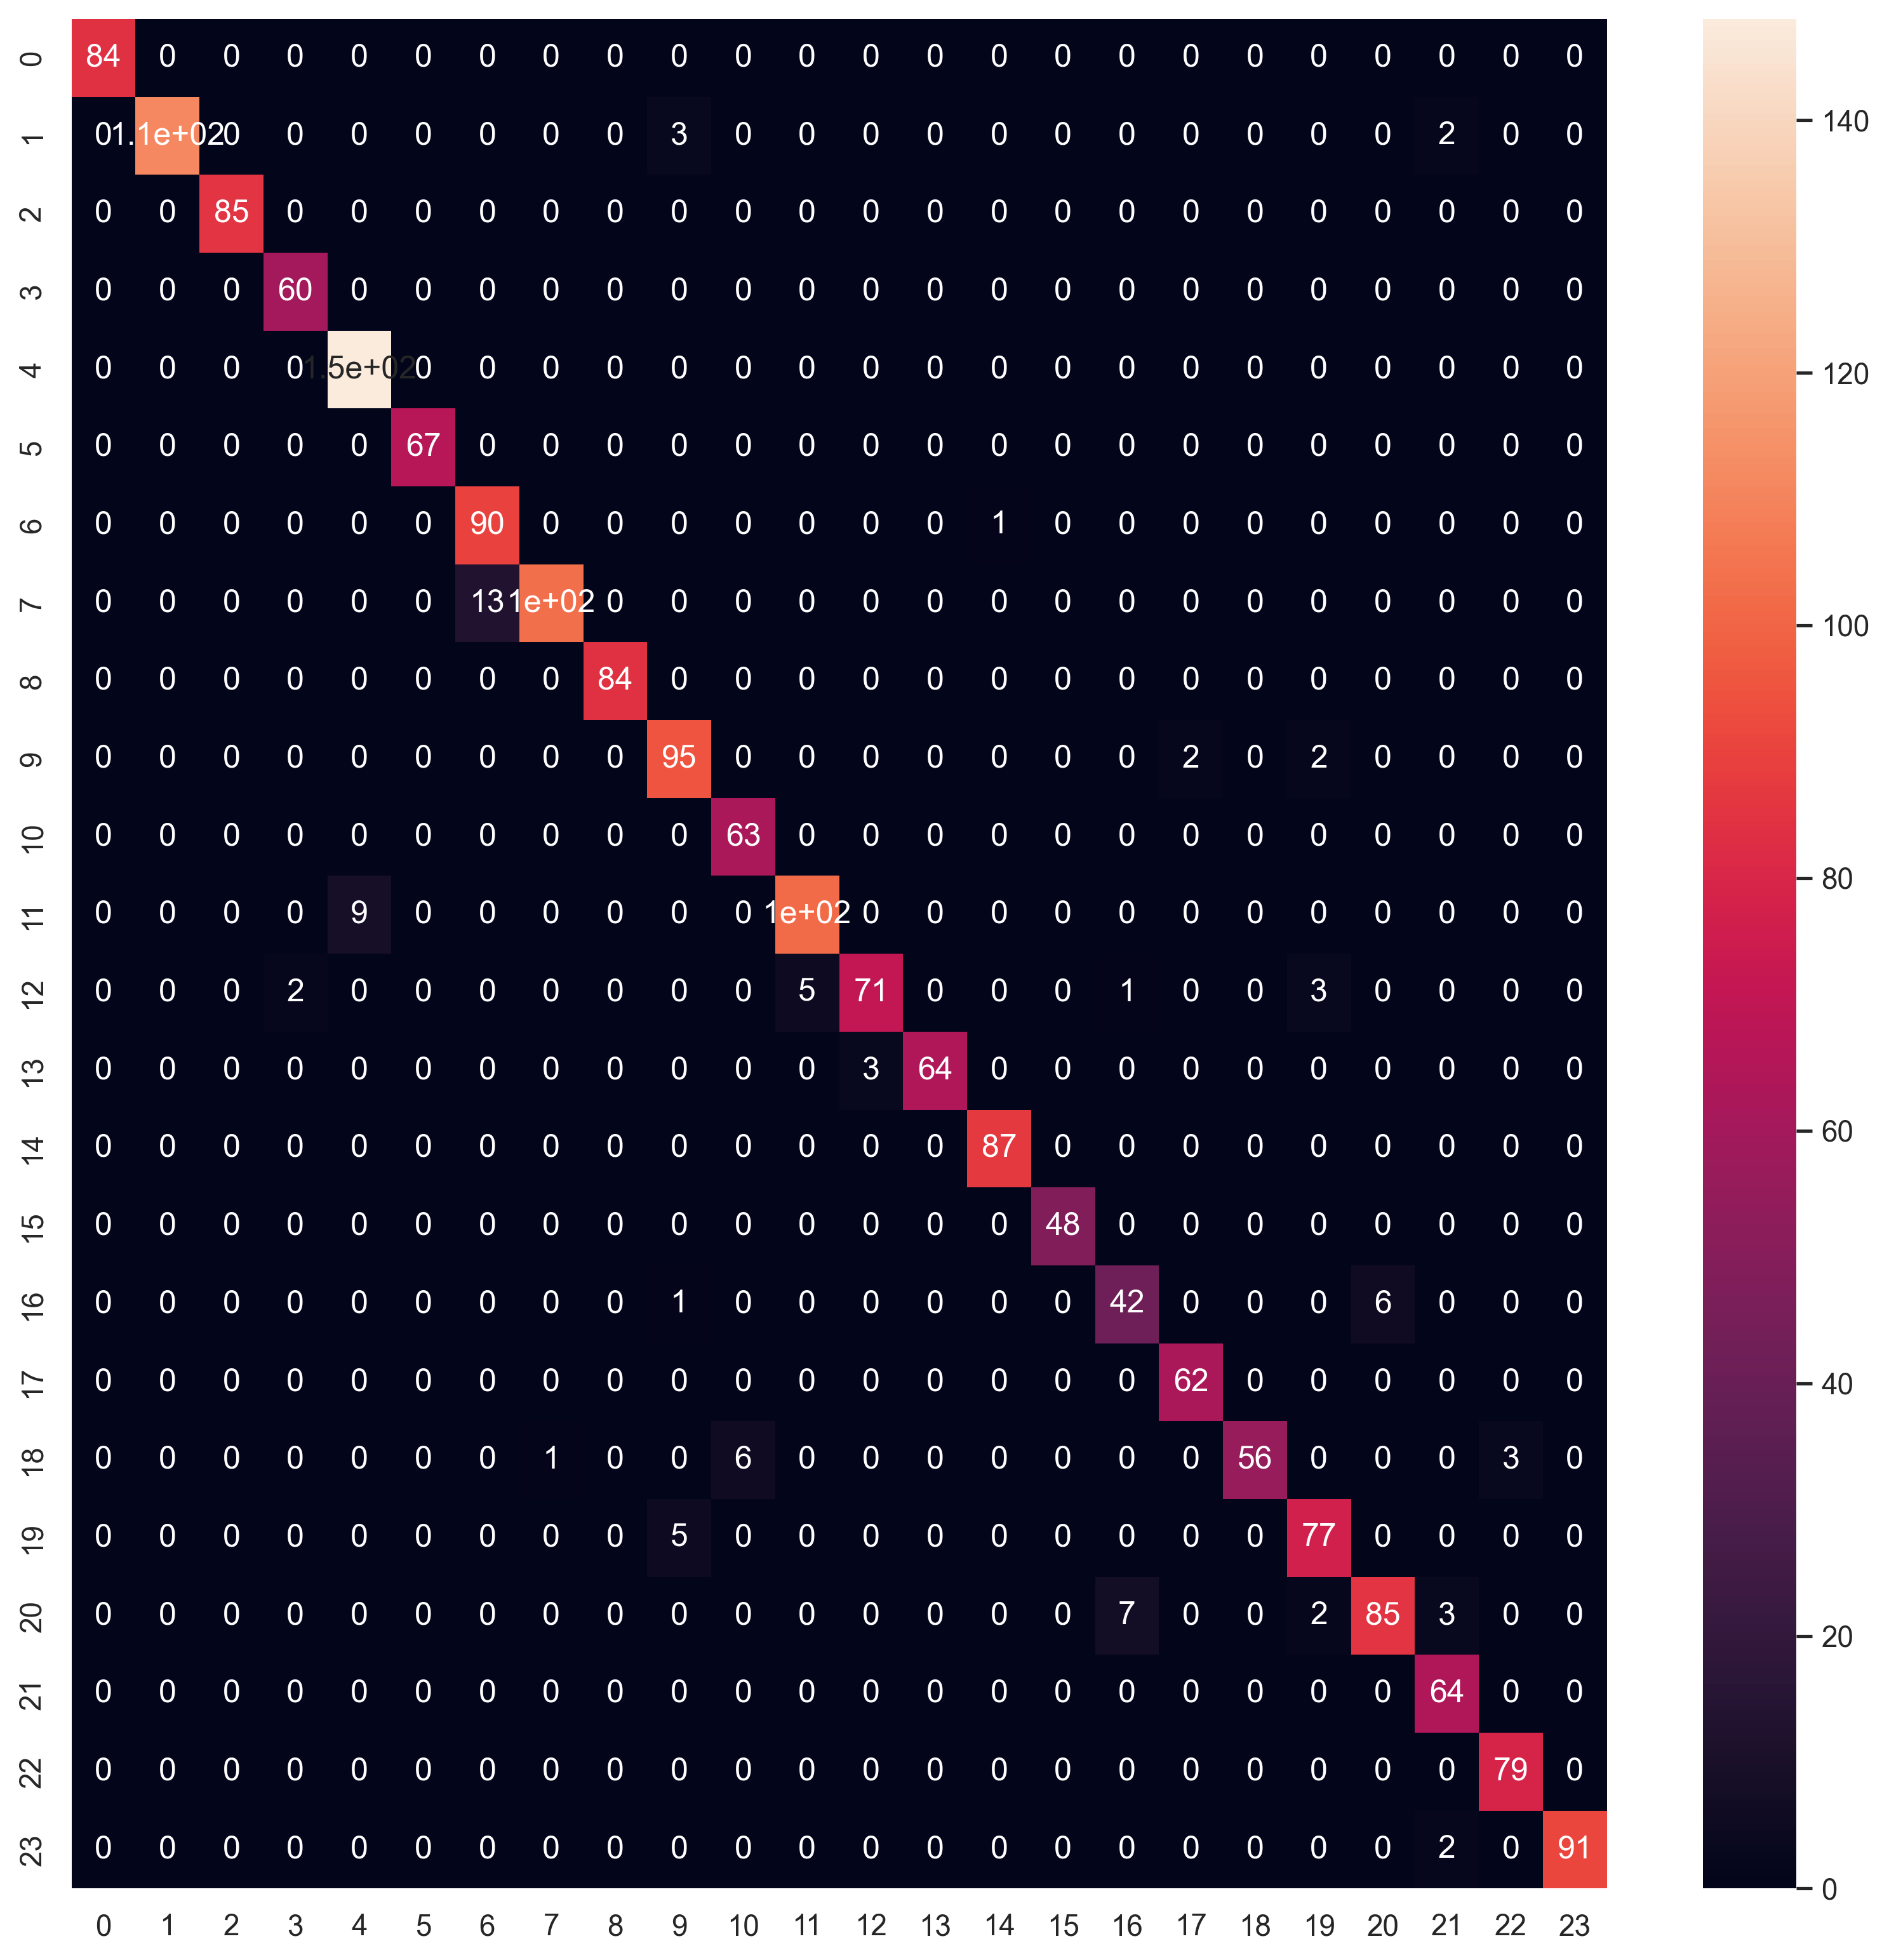

In [51]:
# Predict
y_test_pred = pd.Series(np.argmax(the_best_model.predict(X_test), axis=-1))

# Show confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(13, 13), dpi=300)
sns.heatmap(cm, annot=True)

#### 4.2.2. Find out the letter with the lowest individual accuracy and the most common error (of one letter being incorrectly labelled as another).

In [52]:
def calculate_roc_auc(actual_label, predict_label):
    # Get set of unique labels
    set_unique_labels = set(actual_label)
    
    # Metrics for each label
    roc_auc_dt = {}
    fpr = {}
    tpr = {}
    
    # Loop each label in the set unique labels
    for current_label in set_unique_labels:
        # Other labels except the current label
        others = [x for x in set_unique_labels if x != current_label]
        
        # create new list of actual data and predict data for each label
        # marking 1 as the current class and 0 as other classes
        new_actual_label = [0 if x in others else 1 for x in actual_label]
        new_pred_label = [0 if x in others else 1 for x in predict_label]
        
        # calculate roc_auc for each label
        roc_auc = roc_auc_score(new_actual_label, new_pred_label, average = "macro")
        fpri, tpri, _ = roc_curve(new_actual_label, new_pred_label)
        
        # Letter
        letter = class_names[current_label]
        roc_auc_dt[letter] = roc_auc
        fpr[letter] = fpri[1]
        tpr[letter] = tpri[1]
        
    return roc_auc_dt, fpr, tpr

In [53]:
# Get roc_auc for all labels
roc_auc, fpr, tpr = calculate_roc_auc(y_test, y_test_pred)

df_roc_auc = pd.DataFrame(roc_auc.items(), columns=['letter', 'roc_auc']) 
df_fpr = pd.DataFrame(fpr.items())
df_tpr = pd.DataFrame(tpr.items(), columns=['letter', 'accuracy'])

In [54]:
# Calculate misclassified for each label
misclassified = [0] * 24
for n in range(len(y_test)):
    if(y_test.iloc[n] != y_test_pred[n]):
        misclassified[y_test.iloc[n]] += 1

# Convert misclassified into dataframe
misclassified = pd.DataFrame(misclassified)
misclassified.columns = {'misclassified'}
misclassified = misclassified.rename_axis('label')
misclassified = misclassified.sort_values(by='misclassified', ascending = False)

# Add a letter column
misclassified_label_list = misclassified.index.tolist()
misclassified['letter corresponding to label'] = [class_names[label] for label in misclassified_label_list]

# Display
display(misclassified.head())


print(f"\nThe most common error (of one letter being incorrectly labelled as another) is letter {class_names[misclassified_label_list[0]]}")

,misclassified,letter corresponding to label
label,,
7,13,H
20,12,V
12,11,N
18,10,T
11,9,M



The most common error (of one letter being incorrectly labelled as another) is letter H


<AxesSubplot:xlabel='letter', ylabel='accuracy'>

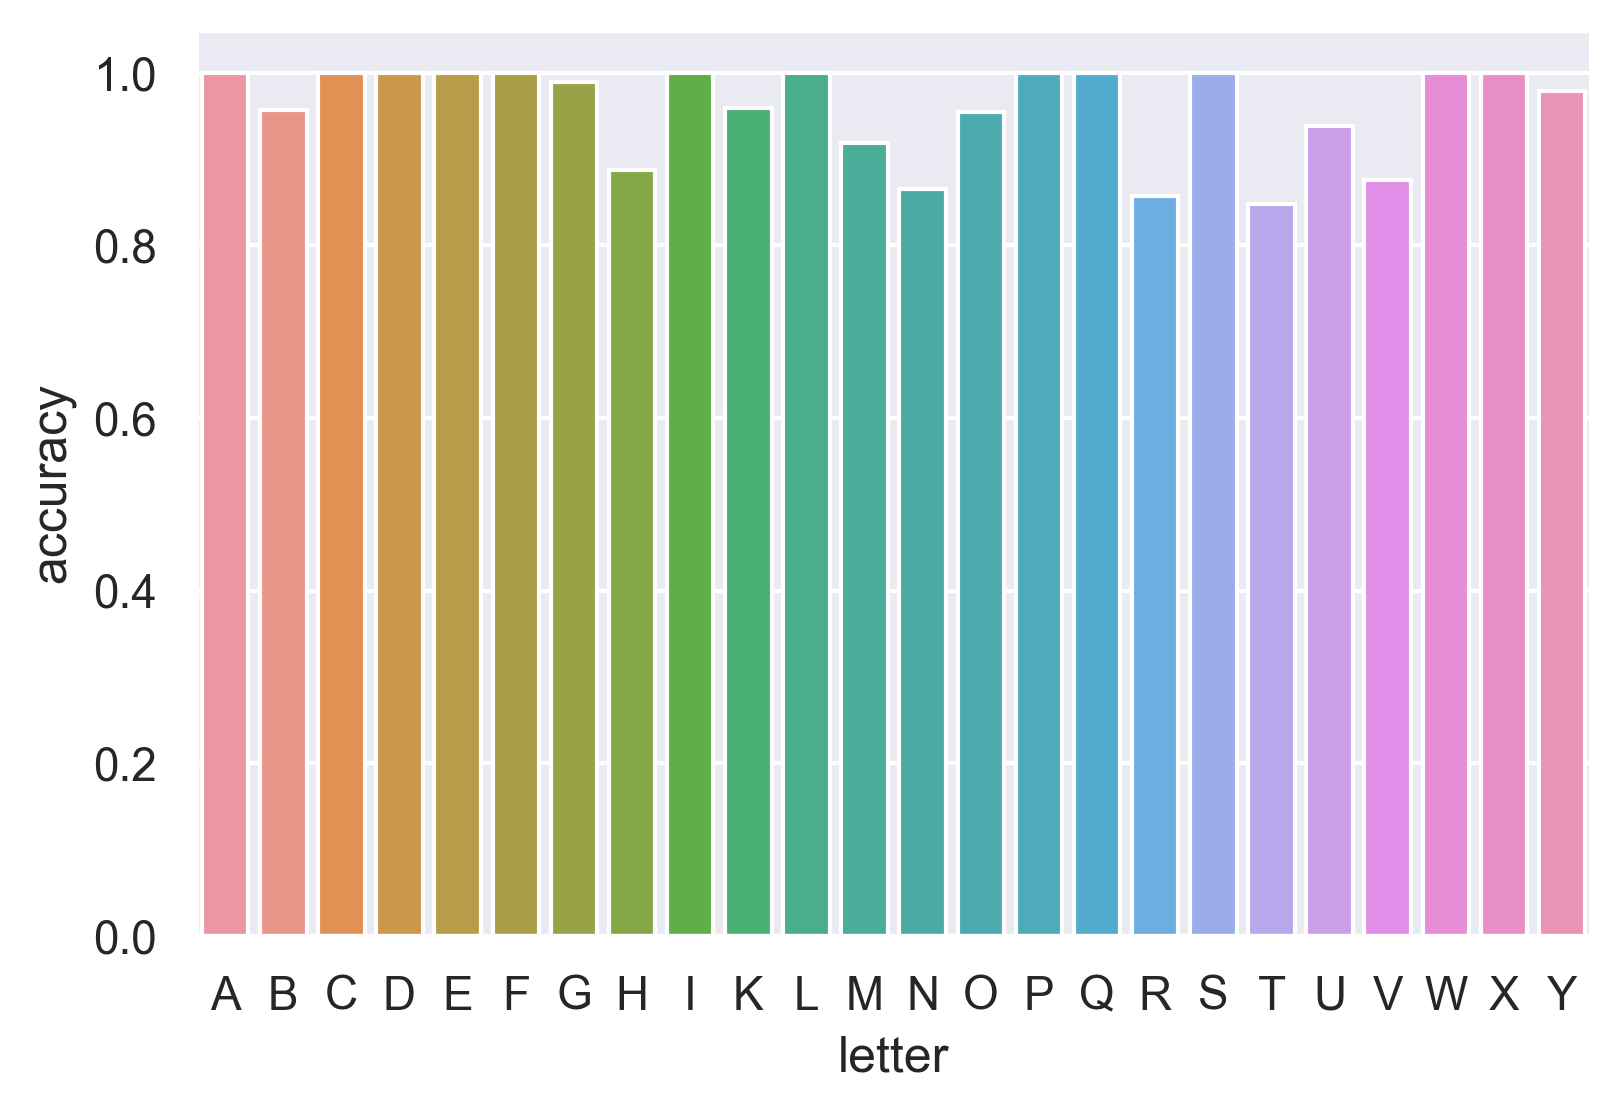

In [55]:
# Plot accuracy for each letter
plt.figure(dpi=300)
sns.barplot(x='letter', y='accuracy', data=df_tpr)

In [56]:
# Find out the letter with the lowest individual accuracy
df_tpr = df_tpr.sort_values(by='accuracy', ascending = True)
accuracy_letter_list = df_tpr.index.tolist()

display(df_tpr.head())

# Show the letter with the lowest individual accuracy
print(f"\nThe letter with the lowest individual accuracy is {class_names[accuracy_letter_list[0]]}")

,letter,accuracy
18,T,0.848485
16,R,0.857143
12,N,0.865854
20,V,0.876289
7,H,0.887931



The letter with the lowest individual accuracy is T


#### 4.2.3. Statistical test between the best and second-best models

In [57]:
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import permutation_test   # pip install mlxtend
from statsmodels.stats.multitest import fdrcorrection

In [58]:
# Predict
y_pred_cnn = np.argmax(cnn_best_model.predict(X_test), axis=-1)
y_pred_resnet = np.argmax(the_best_model.predict(X_test), axis=-1)

63/63 [==============================] - 0s 2ms/step


In [59]:
# run permutation_test for cnn and resnet
p_value = permutation_test(y_pred_cnn, y_pred_resnet, paired=True,
                           func=lambda x, y: np.abs(accuracy_score(y_valid,x) - accuracy_score(y_valid,y)),
                           method="approximate", seed=0, num_rounds=1000)

# Can look at each corrected p-value and compare to 0.05 (below means statistically significant)
# or can look at the whole set together like this ...
if p_value < 0.05:
    print("Statistically significant difference detected")
else:
    print("Differences are not significant statistically")

# Note that an outcome of "not significant statistically" this does not mean there is no difference,
#  as there may be a true difference but the data is too small for the statistical test to be confident about it

Differences are not significant statistically


**write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation**

I have tried some of important hyperparameters such as network architecture, learning rate. These optimization steps are essential for deep learning driven approaches. Even though only 5000 records were used for training, final performance of accuracy was 97% for data test.

Because of the limited number of runs, there are also some other hyperparameters that I haven't tried yet such as activation function, optimizer, and batch normalization, dropout layers, and learning rate scheduler and data augmentation. There is a large room to exploration and improvement.